# Standard Map

Consider a particle that is constrained to move on a ring and additionally, it is kicked periodically by an homogeneous force. The model is described by the Hamiltonian
$$
{\mathcal {H}}(p,\theta,t)={\frac {1}{2}}p^{2}+K\cos(\theta)\sum _{n=-\infty }^{\infty }\delta (t-n)
$$

So, if we consider the stroboscopic map in such times where the kick occur, we get to the standard map, that describes the dynamics of this system
$$
p_{n+1}=p_n+K\sin(\theta_n)
$$

$$
\theta_{n+1}=\theta_n+p_{n+1}
$$

---

We are going to program this, showing how `python` manages vectorized operations.

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def std_map(theta,p,K):
    p=((p+K*np.sin(theta)))
    theta=(theta+p)%(2.0*np.pi)
    return theta,p

Let us take a look to the trajectory of a particular initial condition, for instance for a force for the kick $K=0.2$

In [3]:
theta=[0]
p=[1]
for t in range(100):
    res=std_map(theta[-1],p[-1],0.2)
    theta.append(res[0])
    p.append(res[1])

Then, just let us plot the trajectory after 100 time steps

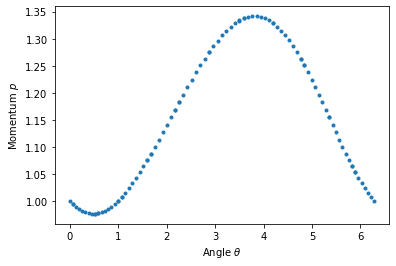

In [4]:
plt.plot(theta,p,'.')
plt.xlabel('Angle $\\theta$')
plt.ylabel('Momentum $p$')
plt.show()

Now consider the following, we want to plot the trajectories of $N$ different initial conditions, so we may create a set of those initial conditions, but randomly distributed

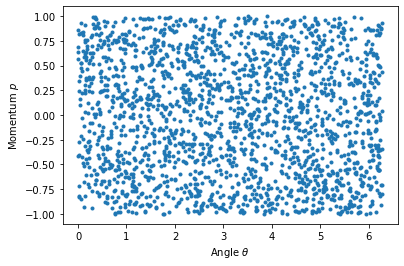

In [5]:
N=2000
theta=np.random.random(N)*2*np.pi
p=2.*np.random.random(N)-1
plt.plot(theta,p,'.')
plt.xlabel('Angle $\\theta$')
plt.ylabel('Momentum $p$')
plt.show()

And then, let us evolve that array as a whole, printing at each time the positions on phase space in order to get the plot of the complete set of trajectories, but only saving the last configuration

(-4.0, 4.0)

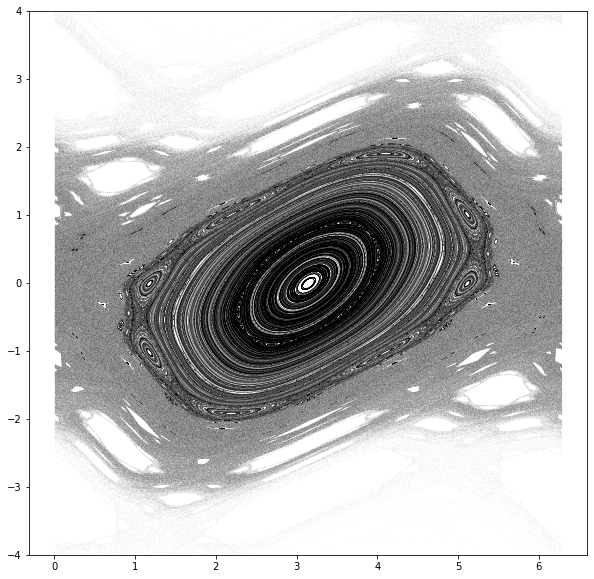

In [6]:
plt.figure(figsize=(10,10))
for t in range(5000):
    theta,p=std_map(theta,p,1.1)
    plt.plot(theta,p,'.',color='k',markersize=0.01)
plt.ylim(-4,4)

Now, let us repeat this same procedure, but now for a large value of the forcing $K$, where the complete phase space is chaotic,

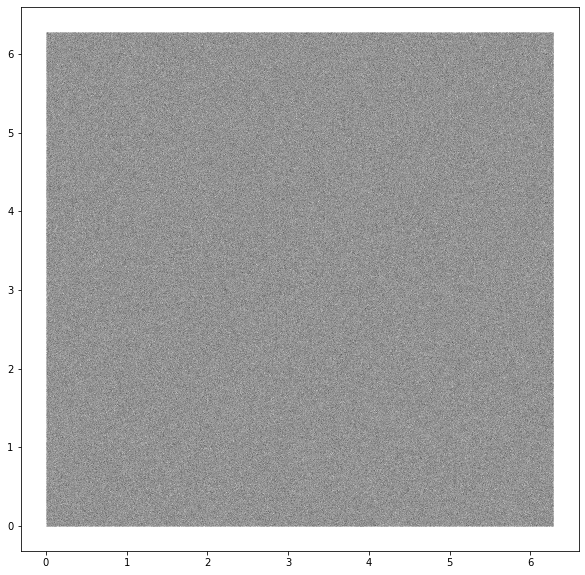

In [7]:
plt.figure(figsize=(10,10))
for t in range(5000):
    theta,p=std_map(theta,p,8)
    plt.plot(theta,(p+np.pi)%(2.*np.pi),'.',color='k',markersize=0.01)

So then, now one can study how is the dynamics of the transition from regular to chaotic based on the external parameter $K$.

0


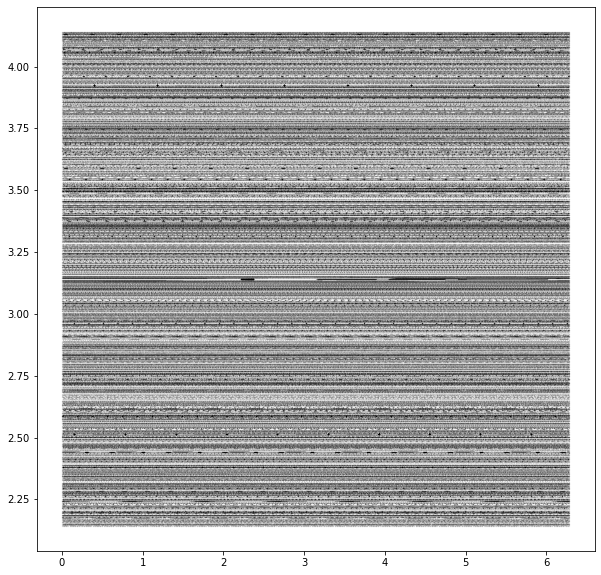

100


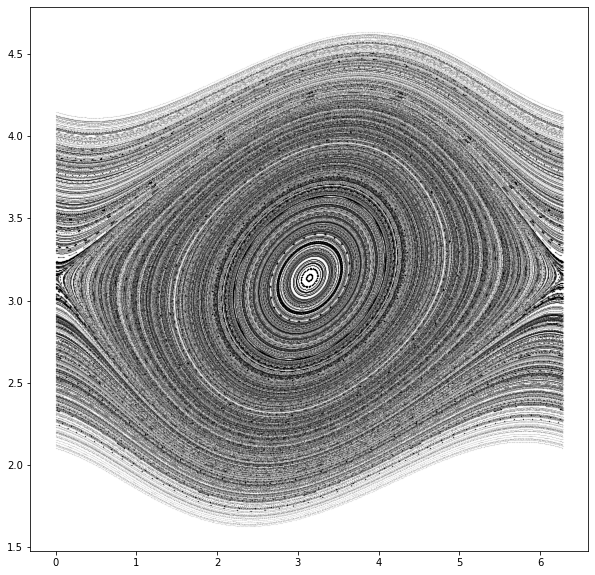

200


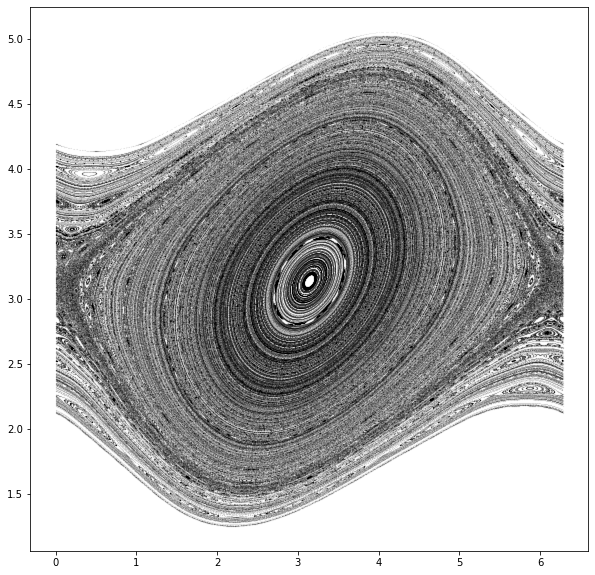

300


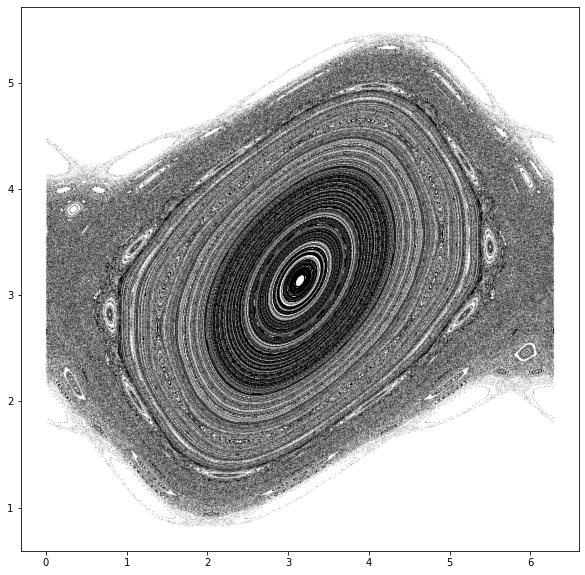

400


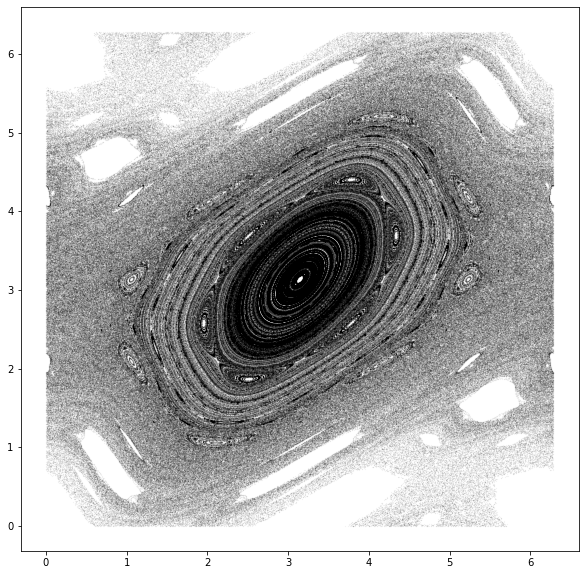

500


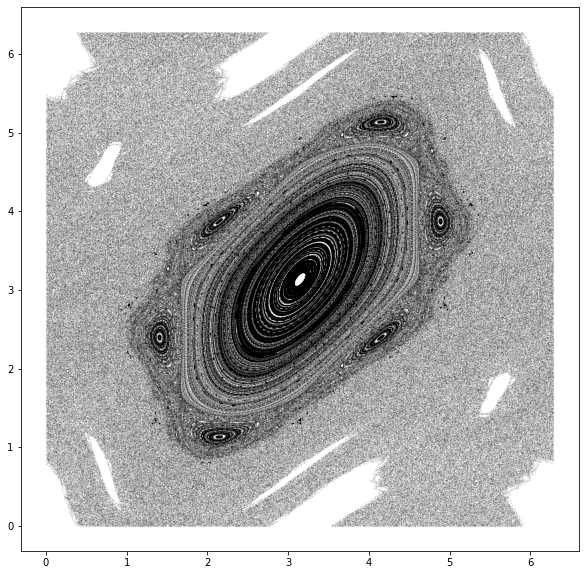

600


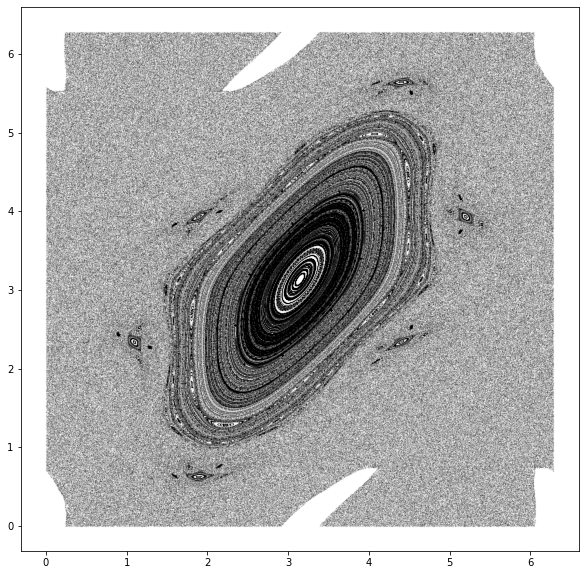

700


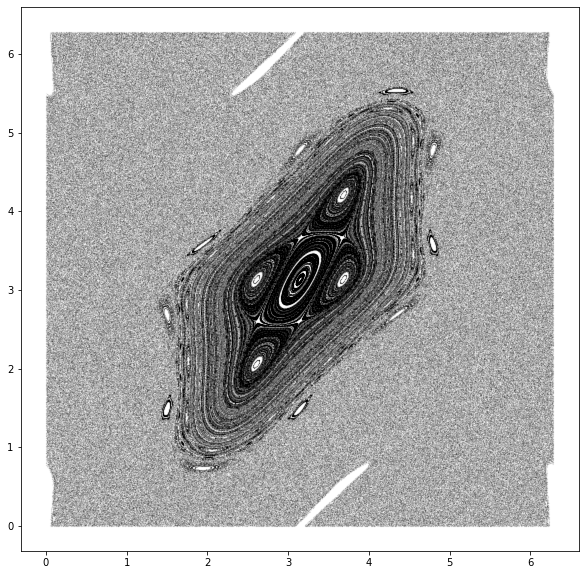

800


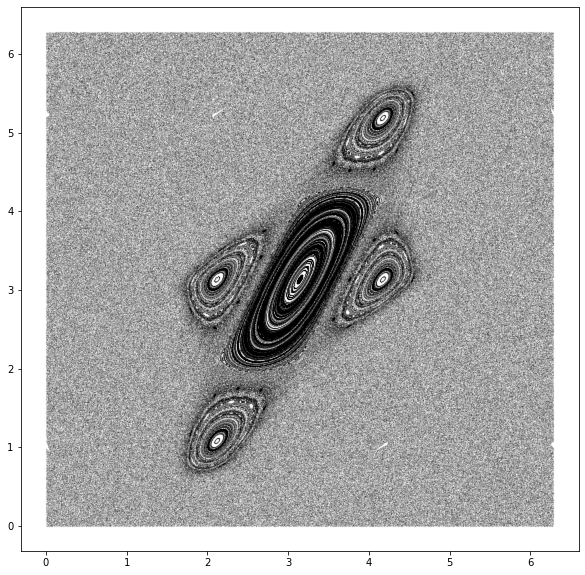

900


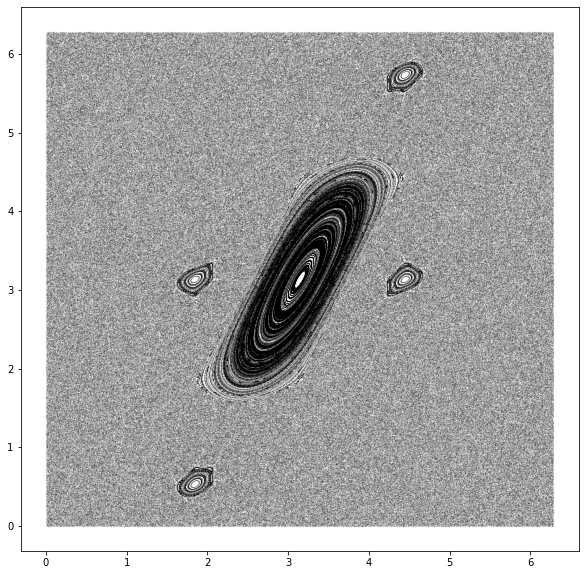

1000


In [ ]:
N=2000

for K in np.linspace(0,10,11):
    print(int(K*100))
    theta=np.random.random(N)*2*np.pi
    p=2.*np.random.random(N)-1
    plt.figure(figsize=(10,10))
    for t in range(1000):
        theta,p=std_map(theta,p,K*0.3)
        plt.plot(theta,(p+np.pi)%(2.*np.pi),'.',color='k',markersize=0.03)
    plt.savefig(str(int(K*100)).zfill(4)+'.png')
    plt.show()

One can start many different analysis here, we are going to see some afterwards as the study of the diffusion of momenta, and even of position if we do not consider this angle as periodic.